In [83]:
from numpy import *
import matplotlib.pyplot as plt  
import scipy.linalg
import pandas as pd
import datetime

In [84]:
data = pd.read_csv('/media/shin/OS/Documents and Settings/shinj/Dropbox/Jacobs Spring 2018/Data_mining/train.csv', sep = ',')

In [85]:
len(data)

52508

In [86]:
data.head()

,Datum,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,Windrichtung152M,Windgeschwindigkeit100MP10,Windgeschwindigkeit100MP20,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
0,2016-01-01 00:00:00,8.490,10.7700,12.690,188.00,190.0,194.00,9.0700,9.630,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400.0,79168
1,2016-01-01 00:15:00,8.395,10.6175,12.475,190.75,193.0,196.75,9.0425,9.555,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400.0,75124
2,2016-01-01 00:30:00,8.300,10.4650,12.260,193.50,196.0,199.50,9.0150,9.480,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400.0,76072
3,2016-01-01 00:45:00,8.205,10.3125,12.045,196.25,199.0,202.25,8.9875,9.405,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400.0,67964
4,2016-01-01 01:00:00,8.110,10.1600,11.830,199.00,202.0,205.00,8.9600,9.330,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400.0,69988


In [87]:
## Parsing Date and time (Seconds omited because they are all '0')

date = data.Datum
Year = []
Month = []
Day = []
Hour = []
Minute = []
for i in date:
    dateparse = datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    Year.append(dateparse.year)
    Month.append(dateparse.month)
    Day.append(dateparse.day)
    Hour.append(dateparse.hour)
    Minute.append(dateparse.minute)
data.insert(0, 'Year', Year)
data.insert(1, 'Month', Month)
data.insert(2, 'Day', Day)
data.insert(3, 'Hour', Hour)
data.insert(4, 'Min', Minute)
data.insert(5, 'Date' Year)
data = data.drop(['Datum'], axis = 1)

In [88]:
data.head()

,Year,Month,Day,Hour,Min,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,...,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
0,2016,1,1,0,0,8.490,10.7700,12.690,188.00,190.0,...,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400.0,79168
1,2016,1,1,0,15,8.395,10.6175,12.475,190.75,193.0,...,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400.0,75124
2,2016,1,1,0,30,8.300,10.4650,12.260,193.50,196.0,...,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400.0,76072
3,2016,1,1,0,45,8.205,10.3125,12.045,196.25,199.0,...,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400.0,67964
4,2016,1,1,1,0,8.110,10.1600,11.830,199.00,202.0,...,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400.0,69988


In [89]:
data.tail()

,Year,Month,Day,Hour,Min,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,...,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
52503,2017,6,30,22,45,4.92,5.9475,6.58,269.25,271.25,...,5.4325,5.73,6.0125,6.2125,6.4175,6.7325,7.2175,1,119000.0,13688
52504,2017,6,30,23,0,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,0,119000.0,17624
52505,2017,6,30,23,15,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,18528
52506,2017,6,30,23,30,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,15836
52507,2017,6,30,23,45,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,15712


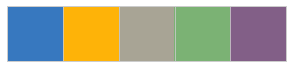

In [90]:
import seaborn as sns
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

In [91]:
#Data Visualization 

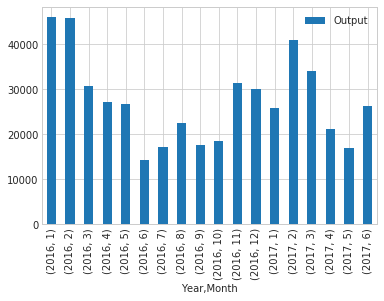

In [92]:
#Average Output per Month
plt.figure(figsize=(30,20))
outputpermonth_avg = data.groupby(['Year','Month'])[['Output']].mean()
outputpermonth_avg.plot(kind='bar')

In [138]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='shinjjo', api_key='ktVTnLIo4eIS27YwLyXl')
outputperday_high = data.groupby(['Year','Month','Day'])[['Output']].max()
outputperday_low = data.groupby(['Year','Month','Day'])[['Output']].min()
outputperday_first = data.groupby(['Year','Month','Day'])[['Output']].first()
outputperday_last = data.groupby(['Year','Month','Day'])[['Output']].last()

In [139]:
candle = go.Candlestick(x=data.Day,
                       open=outputperday_first.Output,
                       high=outputperday_high.Output,
                       low=outputperday_low.Output,
                       close=outputperday_last.Output,
                       increasing=dict(line=dict(color= '#17BECF')),
                       decreasing=dict(line=dict(color= '#7F7F7F')))
candledata = [candle]
py.iplot(candledata, filename='styled_candlestick')

/home/shin/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



PlotlyRequestError: No message

In [137]:
outputperday_high.unstack()

Output                                                    \
Day               1         2         3         4         5         6    
Year Month                                                               
2016 1       79168.0   76524.0   81416.0   74124.0   29884.0   19264.0   
     2      120452.0  120388.0  102192.0   75260.0   87752.0  116744.0   
     3      113168.0  104072.0   37984.0   93068.0    7344.0   17024.0   
     4       29664.0   29184.0   71424.0  106452.0   51304.0  116364.0   
     5       21788.0   42620.0   67092.0   22540.0   68700.0   54992.0   
     6      100720.0   93864.0    8344.0   43732.0   41292.0   19748.0   
     7       75632.0   93880.0   60396.0   11576.0   63212.0   38604.0   
     8       54560.0   22524.0   94324.0   81304.0   45216.0   34288.0   
     9       15388.0   62440.0   24072.0  102384.0   73744.0   20404.0   
     10      55924.0  106476.0   34292.0   72616.0   77992.0   50256.0   
     11      78136.0   51416.0   51788.0   98916.0   51744.0   56256.0   
     12      56852.0   45572.0    5072.0   46700.0   26680.0   60772.0   
2017 1       23500.0   36520.0  105668.0  108060.0   50192.0   47816.0   
     2       61440.0   75180.0   53452.0   67952.0   26148.0   18308.0   
     3       53760.0  117484.0   68656.0   79552.0  109252.0   20520.0   
     4       21124.0   18828.0    2920.0   33508.0   60812.0   64420.0   
     5       84916.0   53664.0   28252.0   97848.0   73168.0   36180.0   
     6       15368.0   21776.0   56796.0   76856.0   66808.0  118720.0   

                                                      ...               \
Day               7         8         9         10    ...           22   
Year Month                                            ...                
2016 1      120492.0  120464.0   98828.0  112552.0    ...      93148.0   
     2      119816.0  120452.0  120400.0   91436.0    ...     120404.0   
     3       17192.0   61736.0   99100.0   39792.0    ...      39856.0   
     4      108536.0   30960.0   43712.0   80104.0    ...      47232.0   
     5       70060.0   87280.0   85828.0   67680.0    ...      76524.0   
     6       27232.0   40424.0   25152.0   15572.0    ...      26452.0   
     7       24704.0   76268.0   81064.0   60776.0    ...      19064.0   
     8       68724.0   85700.0   69136.0   41052.0    ...      76128.0   
     9       32564.0   57360.0   16948.0   29608.0    ...      20288.0   
     10      31996.0   12692.0   17896.0   17444.0    ...      15056.0   
     11      45644.0   23368.0   26812.0   39936.0    ...     114344.0   
     12     101180.0  104460.0   85496.0   81560.0    ...      83920.0   
2017 1       62472.0   11540.0   97348.0   98752.0    ...      12972.0   
     2       29148.0   29336.0   30028.0   39708.0    ...     120440.0   
     3       22600.0  104508.0  114280.0   24256.0    ...      52768.0   
     4       29632.0   12496.0   56880.0   96308.0    ...      84464.0   
     5       36364.0   95072.0   21512.0   36836.0    ...      42796.0   
     6      119136.0   84488.0  108840.0   30720.0    ...     108288.0   

                                                                        \
Day               23        24        25        26        27        28   
Year Month                                                               
2016 1       68380.0   66832.0   99436.0  116640.0  116344.0  104120.0   
     2       62984.0   49120.0   66788.0   30720.0   65872.0   70140.0   
     3       48652.0   61144.0   86644.0  117808.0  116292.0  120128.0   
     4       90832.0  102400.0   75304.0  118652.0   91204.0   92820.0   
     5       95820.0   64132.0    6164.0   19956.0   32824.0   31444.0   
     6       56520.0   29544.0   19936.0   44704.0   43720.0   36520.0   
     7       15780.0    4948.0   32448.0   15384.0   71056.0   52508.0   
     8       54776.0   60384.0   62100.0   43980.0   79352.0  107304.0   
     9       34432.0   95124.0   88116.0   27848.0   95740.0   98076.0   
     10      305

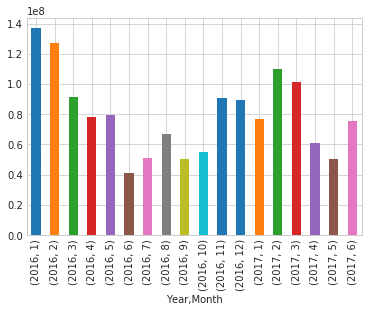

In [18]:
#Total Output per Month
outputpermonth_sum = data.groupby(['Year','Month'])['Output'].sum()
outputpermonth_sum.plot(kind='bar')

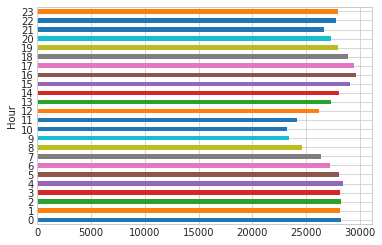

In [14]:
outputperhour_avg = data.groupby(['Hour'])['Output'].mean()
outputperhour_avg.plot(kind='barh')

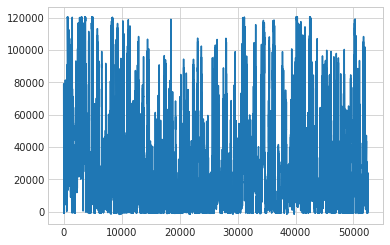

In [15]:
data['Output'].plot(kind='line')

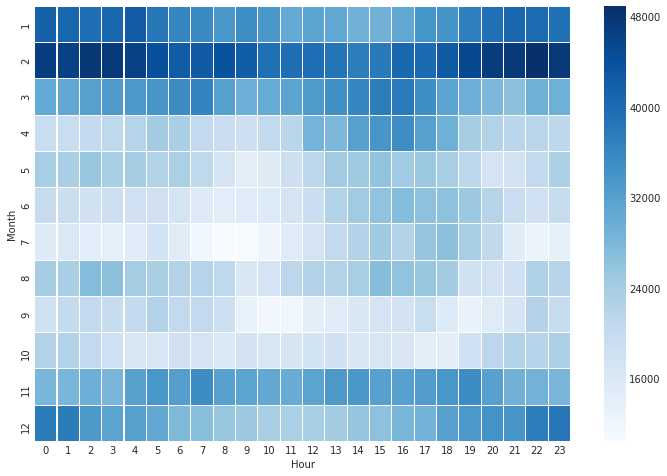

In [16]:
heat = data.groupby(['Month','Hour'], as_index=False)[['Output']].mean()
heatpivot = heat.pivot('Month','Hour','Output')
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatpivot, annot=False, fmt="d", linewidths=.12, ax=None, cbar_ax = None, cmap="Blues")

In [ ]:
heat = data.groupby(['Month','Hour'], as_index=False)[['Output']].mean()
heatpivot = heat.pivot('Month','Hour','Output')
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatpivot, annot=False, fmt="d", linewidths=.12, ax=None, cbar_ax = None, cmap="Blues")